In [1]:
import os
import zipfile
import torch
import numpy as np
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Subset
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder

d:\Programs\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
data_path = "D:\SRH\Master Thesis\Training_Data\Training_Data"
os.listdir("D:\SRH\Master Thesis\Training_Data\Training_Data")

['Computed Tomography (CT) Scan',
 'Endoscopy',
 'Histology',
 'Magnetic Resonance Imaging (MRI)',
 'Non-med',
 'Positron Emission Tomography (PET) Scan',
 'Ultrasound',
 'X-ray']

In [3]:
non_med_train_path = r"D:\SRH\Master Thesis\Data\train\non_med"
non_med_valid_path = r"D:\SRH\Master Thesis\Data\valid\non_med"

# Create train and validation directories if they don't exist
os.makedirs(non_med_train_path, exist_ok=True)
os.makedirs(non_med_valid_path, exist_ok=True)

med_train_path = r"D:\SRH\Master Thesis\Data\train\med"
med_valid_path = r"D:\SRH\Master Thesis\Data\valid\med"

# Create train and validation directories if they don't exist
os.makedirs(med_train_path, exist_ok=True)
os.makedirs(med_valid_path, exist_ok=True)

In [4]:
# Get the subfolders within the Data directory
subfolders = [folder for folder in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder))]

In [5]:
subfolders

['Computed Tomography (CT) Scan',
 'Endoscopy',
 'Histology',
 'Magnetic Resonance Imaging (MRI)',
 'Non-med',
 'Positron Emission Tomography (PET) Scan',
 'Ultrasound',
 'X-ray']

In [6]:
# Separate files into 'Non-med' and 'Med' classes
non_med_files = []
med_files = []

In [7]:
for folder in subfolders:
    folder_path = os.path.join(data_path, folder)
    if folder == 'Non-med':
        # If the 'Non-med' folder has subfolders, collect all the files recursively
        non_med_files.extend([os.path.join(root, file) for root, _, files in os.walk(folder_path) for file in files])
    else:
        med_files.extend([os.path.join(folder_path, file) for file in os.listdir(folder_path)])

In [ ]:
# Split the 'Non-med' files into train and validation sets
non_med_train_files, non_med_valid_files = train_test_split(non_med_files, test_size=0.2, random_state=42)

# Split the 'Med' files into train and validation sets
med_train_files, med_valid_files = train_test_split(med_files, test_size=0.2, random_state=42)

In [ ]:
# Move the files to their respective directories
for file in non_med_train_files:
    #print(file)
    destination = os.path.join(non_med_train_path,os.path.basename(file))
    #print(destination)
    shutil.move(file, destination)

for file in non_med_valid_files:
    destination = os.path.join(non_med_valid_path, os.path.basename(file))
    #print(destiation)
    shutil.move(file, destination)

In [ ]:
for file in med_train_files:
    destination = os.path.join(med_train_path, os.path.basename(file))
    shutil.move(file, destination)

for file in med_valid_files:
    destination = os.path.join(med_valid_path, os.path.basename(file))
    shutil.move(file, destination)

In [2]:
dataset_path = r"D:\SRH\Master Thesis\data"

In [ ]:
dataset = ImageFolder(dataset_path, transform=transforms.ToTensor())

In [3]:
dataset = ImageFolder(dataset_path, transform=transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a consistent size
    transforms.ToTensor()
]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

In [6]:
mean = 0.0
std = 0.0

for images, _ in dataloader:
    batch_mean = torch.mean(images, dim=(0, 2, 3))
    batch_std = torch.std(images, dim=(0, 2, 3))
    mean += batch_mean
    std += batch_std

mean /= len(dataloader)
std /= len(dataloader)

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor([0.5817, 0.5569, 0.5599])
Standard Deviation: tensor([0.3154, 0.3083, 0.3114])


In [7]:
train_dataset_path = r"D:\SRH\Master Thesis\data\train"
test_dataset_path = r"D:\SRH\Master Thesis\data\valid"

In [8]:
# Define the transformation to apply to the images
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to a specific size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean, std)  # Normalize the image tensors
])

transform_valid = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to a specific size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean, std)  # Normalize the image tensors
])

In [9]:
train_dataset = ImageFolder(root = train_dataset_path, transform = transform_train)
test_dataset =ImageFolder(root = test_dataset_path, transform = transform_valid)

In [11]:
def  show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    
    grid = torchvision.utils.make_grid(images,nrow = 3)
    plt.figure(figsize = (11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print("labels: ",labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels:  tensor([0, 0, 0, 0, 0, 0])


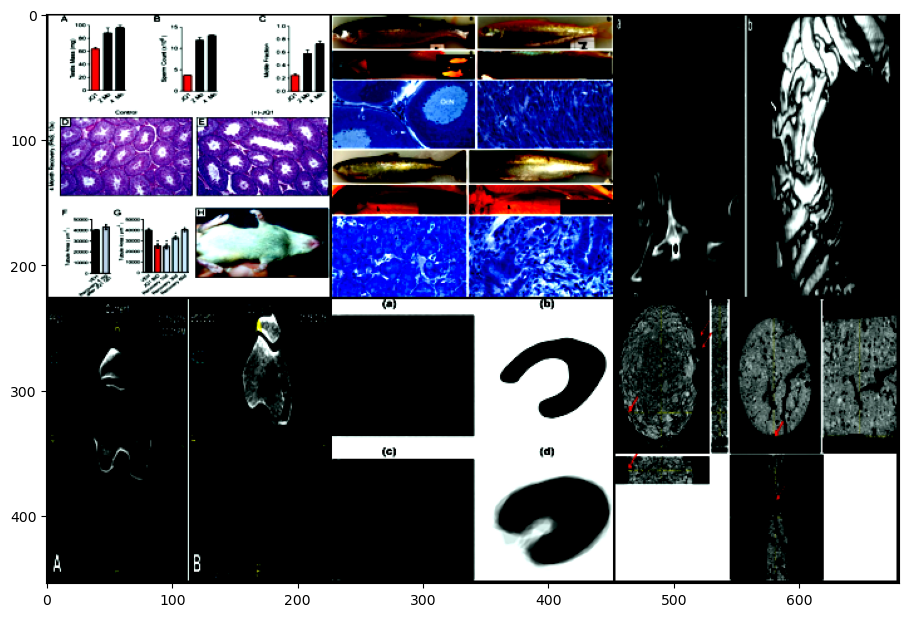

In [12]:
show_transformed_images(train_dataset)

In [13]:
train_load_data = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle=True)
test_load_data = torch.utils.data.DataLoader(test_dataset, batch_size = 64, shuffle=False)

In [14]:
def set_device():
    if torch.cuda.is_available():
        dev = "cuda:0"
    else:
        dev = "cpu"
    return torch.device(dev)

In [15]:
device = set_device()
device

device(type='cuda', index=0)

In [16]:
def save_checkpoint(model, epoch, optimizer, best_accuracy):
    state = {
        'epoch' : epoch + 1,
        'model' : model.state_dict(),
        'best_accuracy' : best_accuracy,
        'optimizer' : optimizer.state_dict()
    }
    torch.save(state, 'model_best_checkpoint.pth.tar')

In [17]:
def evaluate_model_on_test_set(model, test_loader):
    model.eval()
    predicted_correctly = 0
    total = 0
    device = set_device()
    
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)
            
            outputs = model(images)
            
            _, predicted = torch.max(outputs.data, 1)
            
            predicted_correctly += (predicted == labels).sum().item()
            
    epoch_acc = 100.0 * predicted_correctly/total
    print("Testing dataset. Got %d out of %d images correctly (%.3f%%)" % (predicted_correctly, total, epoch_acc))
    return epoch_acc

In [18]:
def train_nn(model, train_loader, test_loader, criterion, optimizer, n_epochs):
    device = set_device()
    best_accuracy = 0
    for epoch in range(n_epochs):
        print("Epoch number %d "% (epoch + 1))
        model.train()
        running_loss = 0.0
        running_correct = 0.0
        total = 0
        
        for data in train_load_data:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            
            _, predicted = torch.max(outputs.data, 1)
            
            loss = criterion(outputs, labels)
            
            loss.backward()
            
            optimizer.step()
            
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()
            
        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100.00*running_correct/total
        
        print(" - Training dataset. Got %d out of %d images correctly (%.3f%%).Epoch loss: %.3f" % (running_correct, total, epoch_acc, epoch_loss))
              
        test_dataset_accuracy = evaluate_model_on_test_set(model, test_loader)
        
        if (test_dataset_accuracy > best_accuracy):
            best_accuracy = test_dataset_accuracy
            save_checkpoint(model, epoch, optimizer, best_accuracy)
              
    print("Fininshed")
    return model

In [19]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

In [20]:
resnet18_model = models.resnet18(pretrained = True)
num_features = resnet18_model.fc.in_features
number_of_classes = 2
resnet18_model.fc = nn.Linear(num_features, number_of_classes)
device = set_device()
resnet_18_model = resnet18_model.to(device)
loss_function = nn.CrossEntropyLoss()

optimizer = optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.003)

d:\Programs\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Programs\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
train_nn(resnet_18_model, train_load_data, test_load_data, loss_function, optimizer, 6)

Epoch number 1 
 - Training dataset. Got 10075 out of 11021 images correctly (91.416%).Epoch loss: 0.232
Testing dataset. Got 2593 out of 2780 images correctly (93.273%)
Epoch number 2 
 - Training dataset. Got 10470 out of 11021 images correctly (95.000%).Epoch loss: 0.127
Testing dataset. Got 2587 out of 2780 images correctly (93.058%)
Epoch number 3 
 - Training dataset. Got 10665 out of 11021 images correctly (96.770%).Epoch loss: 0.083
Testing dataset. Got 2578 out of 2780 images correctly (92.734%)
Epoch number 4 
 - Training dataset. Got 10785 out of 11021 images correctly (97.859%).Epoch loss: 0.060
Testing dataset. Got 2574 out of 2780 images correctly (92.590%)
Epoch number 5 
 - Training dataset. Got 10778 out of 11021 images correctly (97.795%).Epoch loss: 0.057
Testing dataset. Got 2563 out of 2780 images correctly (92.194%)
Epoch number 6 
 - Training dataset. Got 10869 out of 11021 images correctly (98.621%).Epoch loss: 0.041
Testing dataset. Got 2578 out of 2780 images 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [22]:
checkpoint = torch.load("model_best_checkpoint.pth.tar")

In [23]:
print(checkpoint['epoch'])
print(checkpoint['best_accuracy'])

1
93.27338129496403


In [24]:
resnet18_model = models.resnet18()
num_ftrs = resnet18_model.fc.in_features
number_of_classes = 2
resnet18_model.fc = nn.Linear(num_ftrs, number_of_classes)
resnet18_model.load_state_dict(checkpoint['model'])

torch.save(resnet18_model, 'binary_best_model.pth')

In [1]:
import torchvision
import torch
import torchvision.transforms as transforms
import PIL.Image as Image

d:\Programs\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
classes = ["Med", "Non-med"]

In [5]:
model = torch.load('binary_best_model.pth')

In [6]:
mean = [0.5817, 0.5569, 0.5599]
std = [0.3154, 0.3083, 0.3114]

# Define the transformation to apply to the images
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to a specific size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(torch.tensor(mean), torch.tensor(std))  # Normalize the image tensors
])

In [7]:
def classify(model, image_transforms, image_path, classes):
    model = model.eval()
    image = Image.open(image_path)
    image = image_transforms(image).float()
    image = image.unsqueeze(0)

    output = model(image)
    _, predicted = torch.max(output.data, 1)

    print(classes[predicted.item()])

In [8]:
classify(model, image_transforms, r"D:\SRH\Master Thesis\PMC_testing_data\PMC1780056_1471-2377-7-1-4.jpg", classes)

Med
